<a href="https://colab.research.google.com/github/porterjenkins/CS180/blob/main/data_science_labs/data_science_lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 10: Machine Learning with Scikit-Learn

In [4]:
# Dependencies for the lab
import matplotlib.pyplot as plt
import numpy as np

## Introduction:
Introduction:
Scikit-learn is a very popular library for machine learning in Python. You can think of it as an add-on to scipy/numpy with a very large number of implementations of common machine learning algorithms.

In general, the scikit-learn API can help you accomplish the following tasks:
* Preprocessing
* Dimensionality Reduction
* Clustering
* Classification
* Regression

Lab Objective:

Learn and become proficient at using different machine learning algorithms in the Scikit-Learn tool set.

For this lab you will need to create a number of plots where each point is given a different color. You can do this using matplotlib. The basic idea is you can create an array of colors and an array of indices

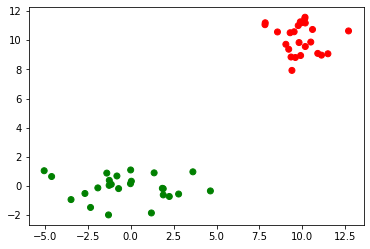

In [5]:
import matplotlib.pyplot as plt
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

n = 25

x1 = np.random.multivariate_normal([10, 10], cov=np.eye(2), size=n)
x1_idx = np.zeros(n, dtype=int)

x2 = np.random.multivariate_normal([0, 0], cov=np.array([[5, 0], [0, 1]]), size=n)
x2_idx = np.ones(n, dtype=int)

X = np.concatenate([x1, x2], axis=0)
X_idx = np.concatenate([x1_idx, x2_idx])

# create the plot and index into the colors array
plt.scatter(X[:, 0], X[:, 1], c=colors[X_idx])

## Exercise 1: Clusters!

In this exercise, you will train three different clustering algorithms on three different datasets. 

### Algorithms:
#### K-means 
* [Overview](https://scikit-learn.org/stable/modules/clustering.html#k-means)
* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

#### DBScan: 

* [Overview](https://scikit-learn.org/stable/modules/clustering.html#dbscan)
* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

#### GMM: 

* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

After reading the above documentation (You can skim it) attempt to explain to me like I'm five, what these algorithms are doing:
 

Explain how K-Means works?

It tries to group the data into clusters. It starts by picking random centroids. Then it assignes each datapoint to a cluster based on the nearest centroid. Then it computes the center of each cluster of data points and makes that the new centroid of the cluster and starts assigning datapoints based on which of the new centroids is closer. It repeats this until the centroids stop significantly moving.

Explain how DBScan works?

DBScan looks at how dense points are. To use it you need to define a distance and a minumun number of close points. This algorithim looks at each datapoint and essentially sees how many points are less than the predefined distance away. Essentially it draws a circle around the point and all points that are within that circle are counted. If a point has more than the minimum number of close points then it is a core point. Once we havee defined all the core points we then pick one core point at random and assign it to the first cluster. Then any core points that are within its neighborhood/circle are also added to this cluster. We keep doing this until there are no more core points to add to this cluster. Then all non-core points that are in the neighborhood of a core point that is in the cluster are added to the cluster. Then we choose another random core point that is not in the first cluster and repeat this process.

Explain how GMM works?

GMM is just like k-means except it also looks at the likelyhood that a point is in that cluster, so it works better for high-dimensional data

#### Datasets:
We will generate three toy datasets using the scikit-learn api, which you can do with the following code:

In [3]:
from sklearn import datasets
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)[0]
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)[0]
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]

In [10]:
noisy_circles

array([[-0.67799938, -0.69875698],
       [ 0.93143746,  0.19139133],
       [ 0.54829131, -0.00601715],
       ...,
       [-0.34518816, -0.35804797],
       [ 0.01719727, -0.94513802],
       [ 0.91377877, -0.59884164]])

This generates three datasets, `noisy_circles`, `noisy_moons`, and `blobs`

Your Task: 
* We want you to train each clustering algorithm on each dataset (you should have a total of 9 plots).
* For each dataset/algorithm, plot the points. Color the points using the cluster the belong to

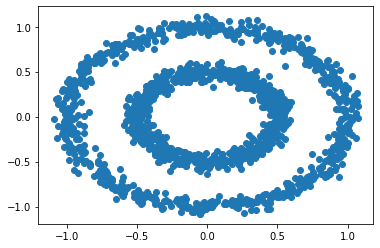

In [13]:
#Enter the code for exercise 1 here
from sklearn.cluster import KMeans
# plt.scatter(X[:, 0], X[:, 1], c=colors[X_idx])
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1])


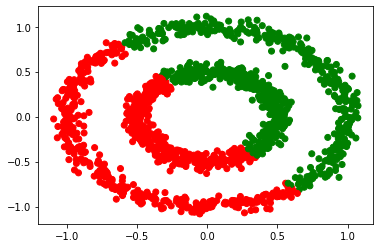

In [38]:
data= noisy_circles
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(data)
plt.scatter(data[:, 0], data[:, 1],c=colors[kmeans.labels_])

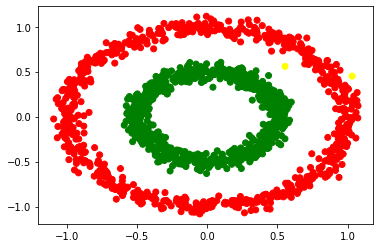

In [39]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=.1, min_samples=3).fit(data)
plt.scatter(data[:, 0], data[:, 1],c=colors[clustering.labels_])

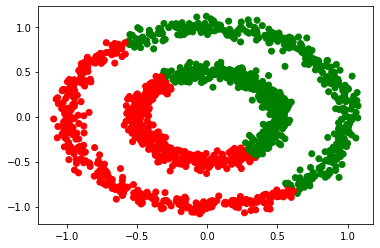

In [40]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit(data)
plt.scatter(data[:, 0], data[:, 1],c=colors[gm.predict(data)])


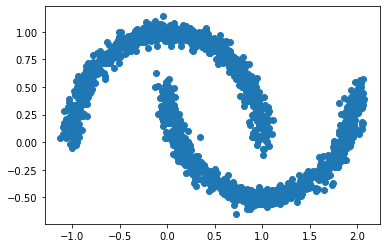

In [41]:
data = noisy_moons
plt.scatter(data[:, 0], data[:, 1])

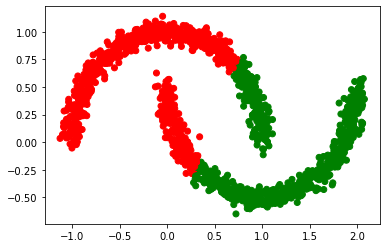

In [42]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(data)
plt.scatter(data[:, 0], data[:, 1],c=colors[kmeans.labels_])

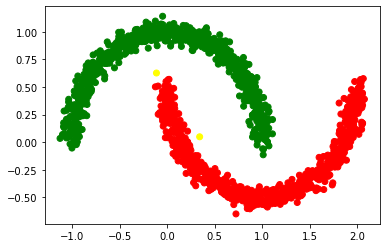

In [43]:
clustering = DBSCAN(eps=.1, min_samples=3).fit(data)
plt.scatter(data[:, 0], data[:, 1],c=colors[clustering.labels_])

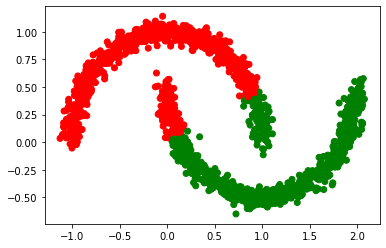

In [44]:
gm = GaussianMixture(n_components=2, random_state=0).fit(data)
plt.scatter(data[:, 0], data[:, 1],c=colors[gm.predict(data)])

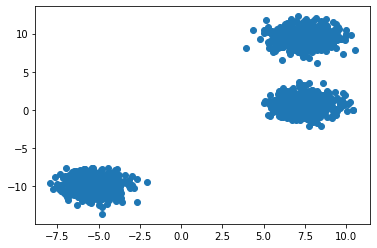

In [45]:
data = blobs
plt.scatter(data[:, 0], data[:, 1])

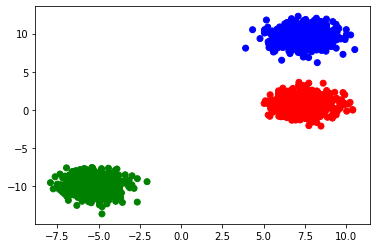

In [52]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(data)
plt.scatter(data[:, 0], data[:, 1],c=colors[kmeans.labels_])

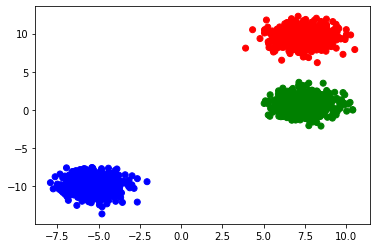

In [50]:
clustering = DBSCAN(eps=2, min_samples=3).fit(data)
plt.scatter(data[:, 0], data[:, 1],c=colors[clustering.labels_])

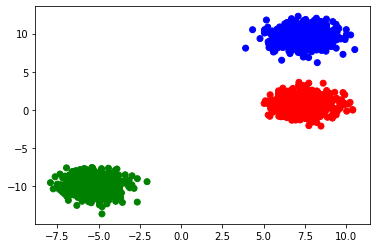

In [53]:
gm = GaussianMixture(n_components=3, random_state=0).fit(data)
plt.scatter(data[:, 0], data[:, 1],c=colors[gm.predict(data)])

## Exercise 2: Flower Power Returns


In the previous exercise we looked simple datasets with 2 dimensions (features). In real life, we often have many more variables than. Clustering algorithms can also be applied to higher dimensional data. For this exercise train k-means on the Iris dataset, which has 4 dimensions (features). This is difficult visualize so we will also apply a dimensionality technique to the data to reduce to 2-D strictly to create a plot.

### Dataset
Download the iris dataset and cast to a numpy array

In [54]:
import statsmodels.api as sm
df = sm.datasets.get_rdataset(dataname='iris', package='datasets').data
X = df.iloc[:, :4].values

We know the iris dataset has three classes `['setosa', 'versicolor', 'virginica']`

Your Task: 
* Train K-means on the iris dataset with 3 clusters

In [69]:
from sklearn.cluster import KMeans
# your code goes here
# clusters = get predicted clusters indices
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)


Now let’s visualize the clusters by reducing the feature space to 2-D. This will allow us to create a plot. We will use T-distributed Stochastic Neighbor Embedding [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [55]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X)

Your Task:
* Create a plot using X_reduced, where each point is colored according to its cluster id.

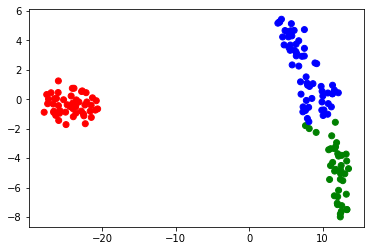

In [70]:
#Enter your code for the X_reduced plot here.
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=colors[kmeans.labels_])


Comment on your observations. Were we successfully able to group samples together without labels?

Yeah it looks like the the data was grouped into 3 clusters, but two of the cluster seem to have some overlap

## Exercise 3: Split the Data

Use the train_test_split() function in sklearn (sklearn.model_selection.train_test_split ) to split the iris data set. Report the number of samples in both the train and test set.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()
#Split the dataset here
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42)

# Print the number of samples in the train and test set
print(X_train.shape[0])
print(X_test.shape[0])

120
30


What is the number of samples in the train set?

120

What is the number of samples in the test set?

30

## Exercise 4: K Nearest Neighbors

Your Task: 
* Train a K-nearest neighbors (sklearn.neighbors.KNeighborsClassifier ) on the iris data.

* Train your KNN when the n_neighbors parameter is 5. Report your train accuracy and test accuracy

* Perform a grid search over the parameter n_neighbors over the range 1-20:

* For each value of n_neighbors, fit a KNN and record your train and test accuracy

* Create a plot showing the test/train accuracy over the n_neighbors



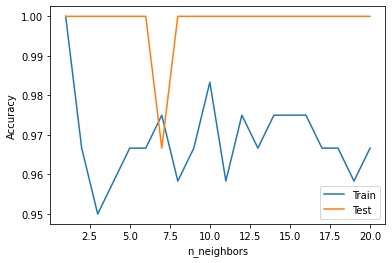

In [88]:
# Enter your code for Exercise 4 here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
knn.score(X_train, y_train)

param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

trainScores = []
testScores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    trainScores.append(train_acc)
    testScores.append(test_acc)

# Create a plot of the test/train accuracy over n_neighbors
plt.plot(range(1, 21), trainScores, label='Train')
plt.plot(range(1, 21), testScores, label='Test')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

What is your train accuracy and test accuracy for when the n_neighbors parameter is 5

the train accuracy is 0.9666 and the test accuracy is 1.0

Discuss what you learn. How does train and test accuracy behave as you change the number of neighbors?

Test seems to stay pretty consistent for each number of neighbors except around 7 where it goes way down. For training data the accuracy seems to be pretty varied